In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r = norm.rvs(size=10000)

In [3]:
counts, bins = np.histogram(r, bins=20)

In [4]:
width = (bins[1:] - bins[:-1])[0]
width

0.3652980691821348

In [98]:
def gain_shift(counts, bins, width, multiplier=1.5, n=100):
    stretch = np.array([])
    left = np.min(bins)
    nbins = np.array([bins[0]])
    for i, c in enumerate(counts[1:]):
        # nbins = np.append(nbins, nbins[-1]+width)
        new = np.linspace(counts[i], c, num=n, endpoint=False)
        stretch = np.append(stretch, new)

        # nbins = np.append(nbins, nbins[-1]+width)
        # stretch = np.append(stretch, c)
    # nbins = np.append(nbins, nbins[-1]+width)
    stretch = np.append(stretch, counts[-1])
    keep = np.sort(np.random.choice(stretch.shape[0], size=int(stretch.shape[0]*(multiplier/n)), replace=False))
    print(stretch.shape, nbins.shape)
    print(stretch)
    stretch = stretch[keep]
    nbins = np.arange(bins[0], bins[0]+(width*(len(stretch)+1)), width)
    # nbins = nbins[keep]

    return stretch, nbins

In [92]:
np.sum(counts/np.sum(counts))

0.9999999999999999

In [76]:
print(counts.shape, stretch.shape, nbins.shape)

(20,) (19,) (20,)


In [77]:
print(np.sum(counts))
print(np.sum(stretch))

10000
7210.5


(39,) (1,)
[   3.     5.5    8.    21.5   35.    58.5   82.   129.   176.   280.
  384.   510.   636.   798.   960.  1089.5 1219.  1290.  1361.  1412.5
 1464.  1399.5 1335.  1151.5  968.   810.5  653.   512.   371.   288.5
  206.   146.    86.    60.5   35.    25.    15.     9.     3. ]


(array([   6.84462697,   43.55671707,  219.02806297,  348.45373654,
         477.87941012,  634.68359156,  791.48777301, 1355.85837845,
        1517.0182316 , 1605.37614336, 1821.91525107,  812.64389273,
         181.69373406,   75.29089665,   43.55671707,   31.11194076,
          18.66716446,   11.20029867,    3.73343289]),
 array([-3.682009  , -3.31671093, -2.95141286, -2.58611479, -2.22081673,
        -1.85551866, -1.49022059, -1.12492252, -0.75962445, -0.39432638,
        -0.02902831,  0.33626976,  0.70156783,  1.0668659 ,  1.43216397,
         1.79746204,  2.1627601 ,  2.52805817,  2.89335624,  3.25865431]),
 <BarContainer object of 19 artists>)

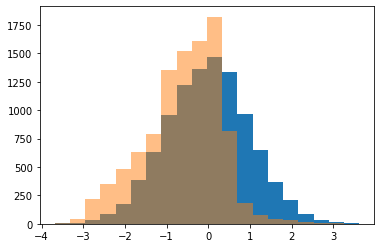

In [102]:
stretch, nbins = gain_shift(counts, bins, width, multiplier=1.0, n=2)
plt.hist(bins[:-1], bins, weights=counts)
plt.hist(nbins[:-1], nbins, weights=stretch*(np.sum(counts)/np.sum(stretch)), alpha=0.5)